In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as fft
import scipy.signal as signal
import scipy.fftpack as fftpack

0.005
200.0


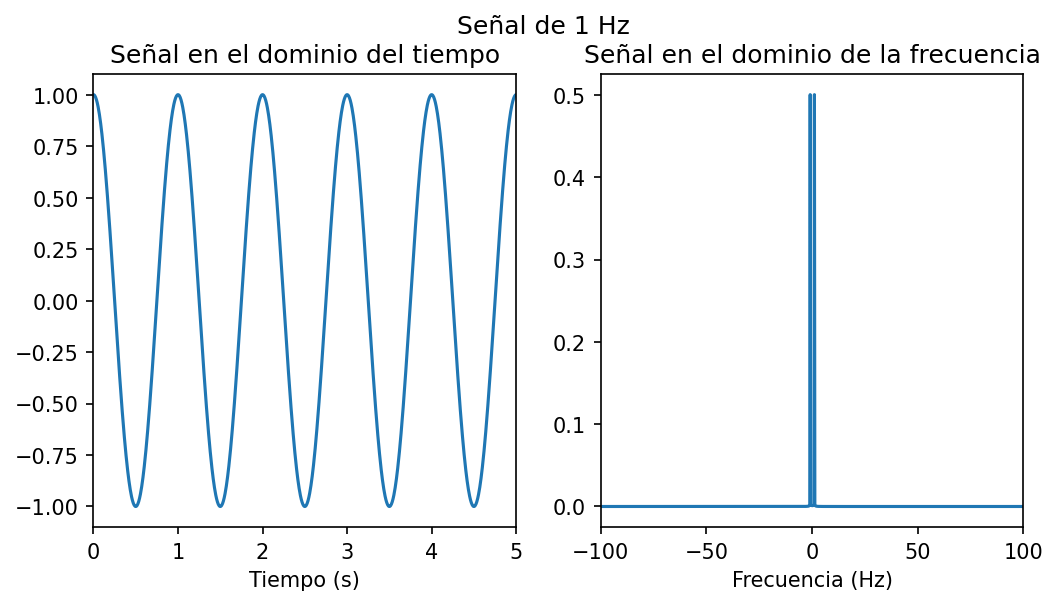

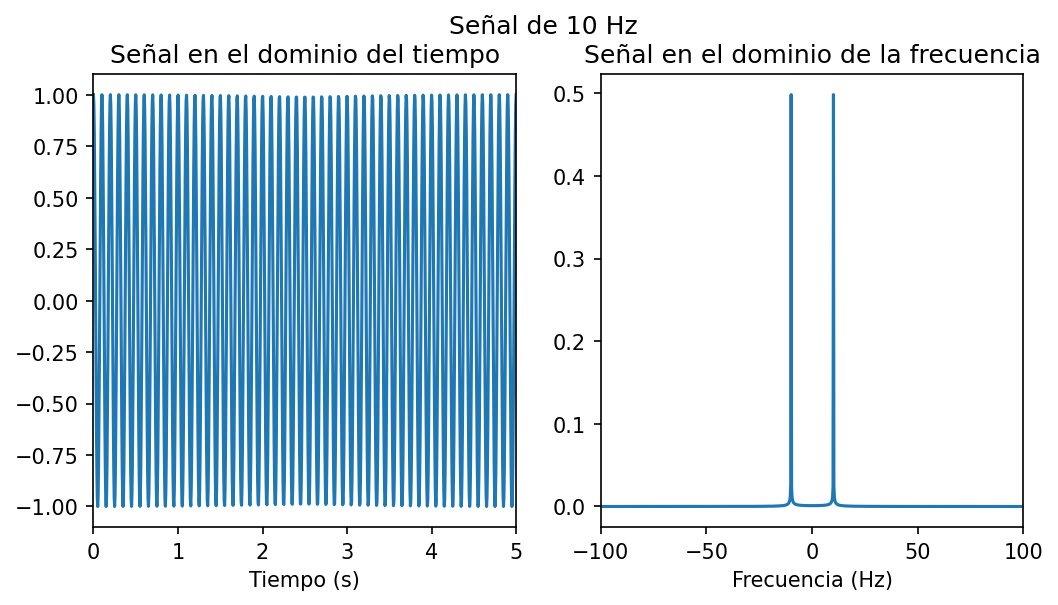

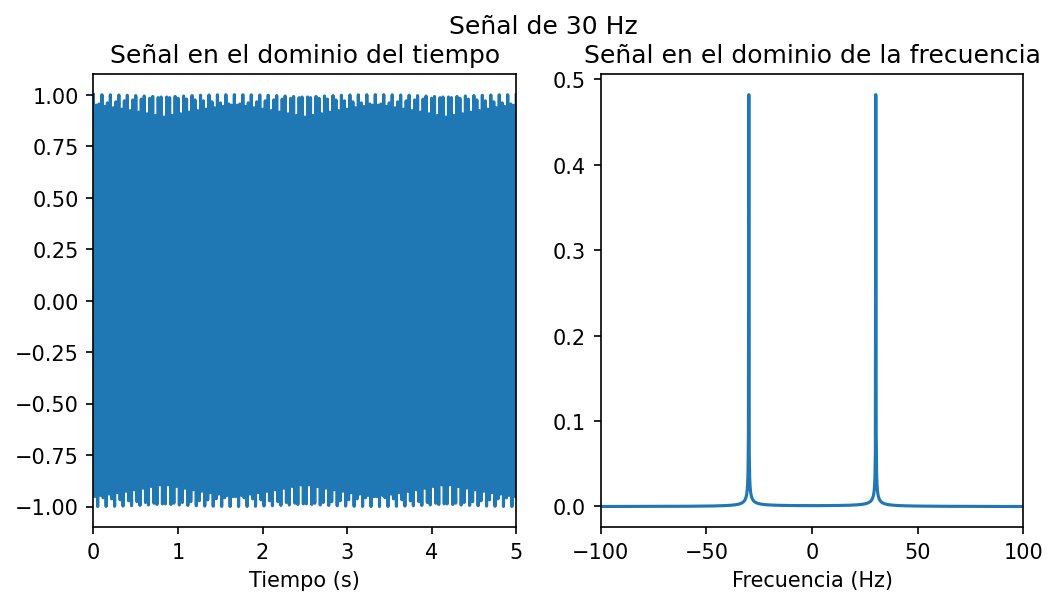

In [3]:

T = 5
N = 1000

dt = T / N
Fs = 1 / dt

print(dt)
print(Fs)

for F in [1, 10, 30]:
    fig = plt.figure(figsize=(8, 4), dpi=150)
    Fs = N / T

    fig.tight_layout()
    plt.suptitle(f"Señal de {F} Hz")

    fig.add_subplot(121)

    t = np.linspace(0, T, N)
    x = np.cos(2 * np.pi * F * t)
    plt.plot(t, x)
    plt.xlim([0, T])
    plt.title("Señal en el dominio del tiempo")
    plt.xlabel("Tiempo (s)")

    fig.add_subplot(122)

    X = fft.fftshift(fft.fft(x)) / N
    f = np.linspace(-Fs/2, Fs/2, N)

    plt.plot(f, np.abs(X))
    plt.xlim([np.min(f), np.max(f)])
    plt.title("Señal en el dominio de la frecuencia")
    plt.xlabel("Frecuencia (Hz)")

    plt.plot()
    plt.savefig(f"outputs/dimp 10 {F} Hz and spectrum.png")


0.005
200.0


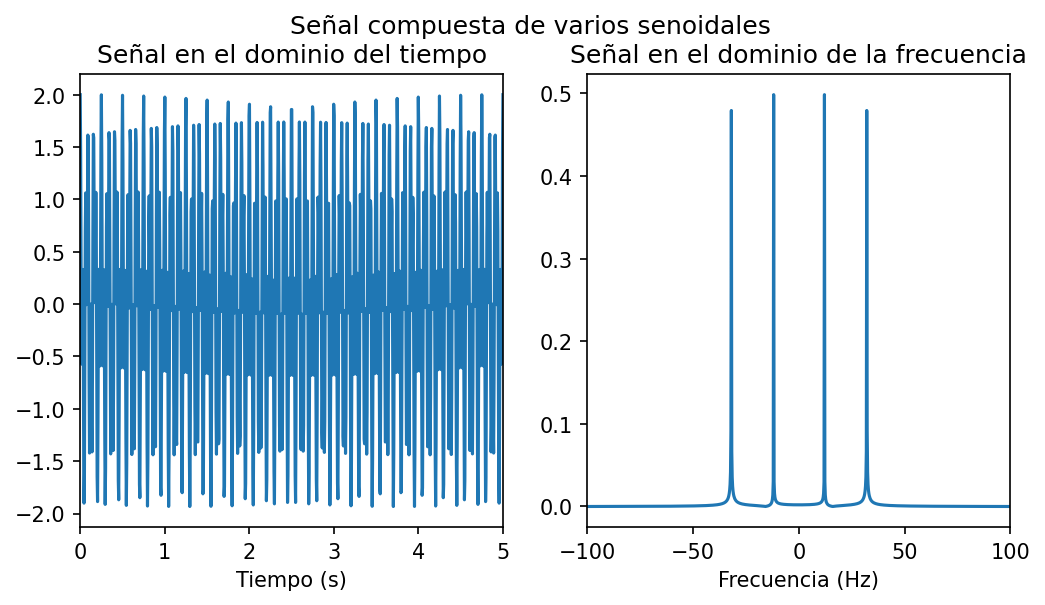

In [4]:

T = 5
N = 1000

dt = T / N
Fs = 1 / dt

print(dt)
print(Fs)



for F in [1]:
    fig = plt.figure(figsize=(8, 4), dpi=150)
    Fs = N / T

    fig.tight_layout()
    plt.suptitle(f"Señal compuesta de varios senoidales")

    fig.add_subplot(121)

    t = np.linspace(0, T, N)
    x = np.cos(2 * np.pi * 12 * F * t) + np.cos(2 * np.pi * 32 * F * t)
    plt.plot(t, x)
    plt.xlim([0, T])
    plt.title("Señal en el dominio del tiempo")
    plt.xlabel("Tiempo (s)")

    fig.add_subplot(122)

    X = fft.fftshift(fft.fft(x)) / N
    f = np.linspace(-Fs/2, Fs/2, N)

    plt.plot(f, np.abs(X))
    plt.xlim([np.min(f), np.max(f)])
    plt.title("Señal en el dominio de la frecuencia")
    plt.xlabel("Frecuencia (Hz)")

    plt.plot()
    plt.savefig(f"outputs/dimp 10 composed image.png")


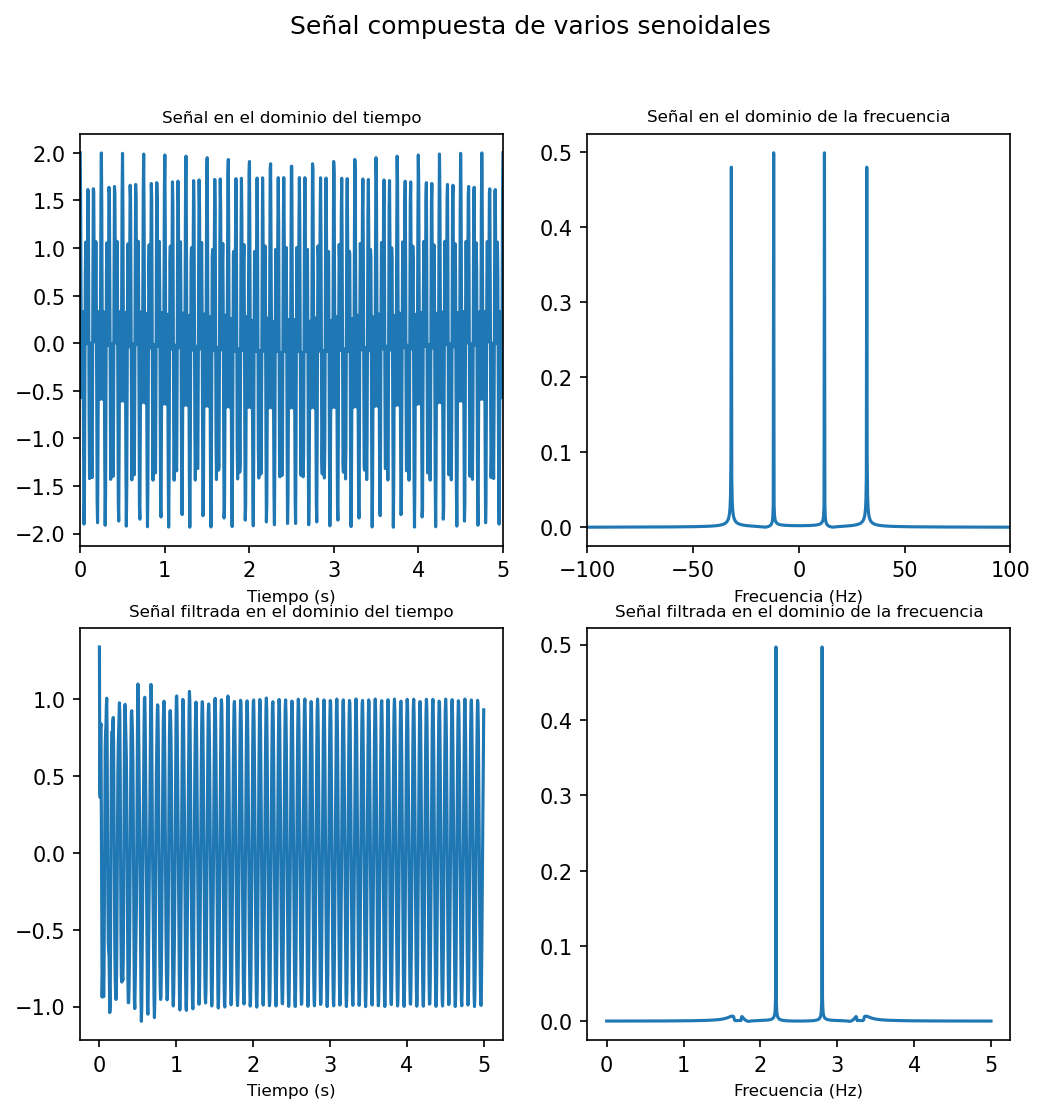

In [5]:

T = 5
N = 1000

dt = T / N
Fs = 1 / dt

fontdict = {
    "size": 8
}

for F in [1]:
    fig = plt.figure(figsize=(8, 8), dpi=150)
    plt.tight_layout()

    Fs = N / T

    fig.tight_layout()
    plt.suptitle(f"Señal compuesta de varios senoidales")

    fig.add_subplot(221)

    t = np.linspace(0, T, N)
    x = np.cos(2 * np.pi * 12 * F * t) + np.cos(2 * np.pi * 32 * F * t)
    plt.plot(t, x)
    plt.xlim([0, T])
    plt.title("Señal en el dominio del tiempo", fontdict=fontdict)
    plt.xlabel("Tiempo (s)", fontdict=fontdict)

    fig.add_subplot(222)

    X = fft.fftshift(fft.fft(x)) / N
    f = np.linspace(-Fs/2, Fs/2, N)

    plt.plot(f, np.abs(X))
    plt.xlim([np.min(f), np.max(f)])
    plt.title("Señal en el dominio de la frecuencia", fontdict=fontdict)
    plt.xlabel("Frecuencia (Hz)", fontdict=fontdict)

    fig.add_subplot(223)

    sos = signal.butter(10, [30, 34], 'bandstop', fs=Fs, output='sos')
    filtered = signal.sosfilt(sos, x)
    plt.plot(t, filtered)
    plt.title("Señal filtrada en el dominio del tiempo", fontdict=fontdict)
    plt.xlabel("Tiempo (s)", fontdict=fontdict)

    fig.add_subplot(224)

    X_filtered = fft.fftshift(fft.fft(filtered)) / N
    f = np.linspace(-Fs/2, Fs/2, N)

    plt.plot(t, np.abs(X_filtered))
    plt.title("Señal filtrada en el dominio de la frecuencia",  fontdict=fontdict)
    plt.xlabel("Frecuencia (Hz)", fontdict=fontdict)

    plt.savefig(f"outputs/dimp 10 filtered.png")


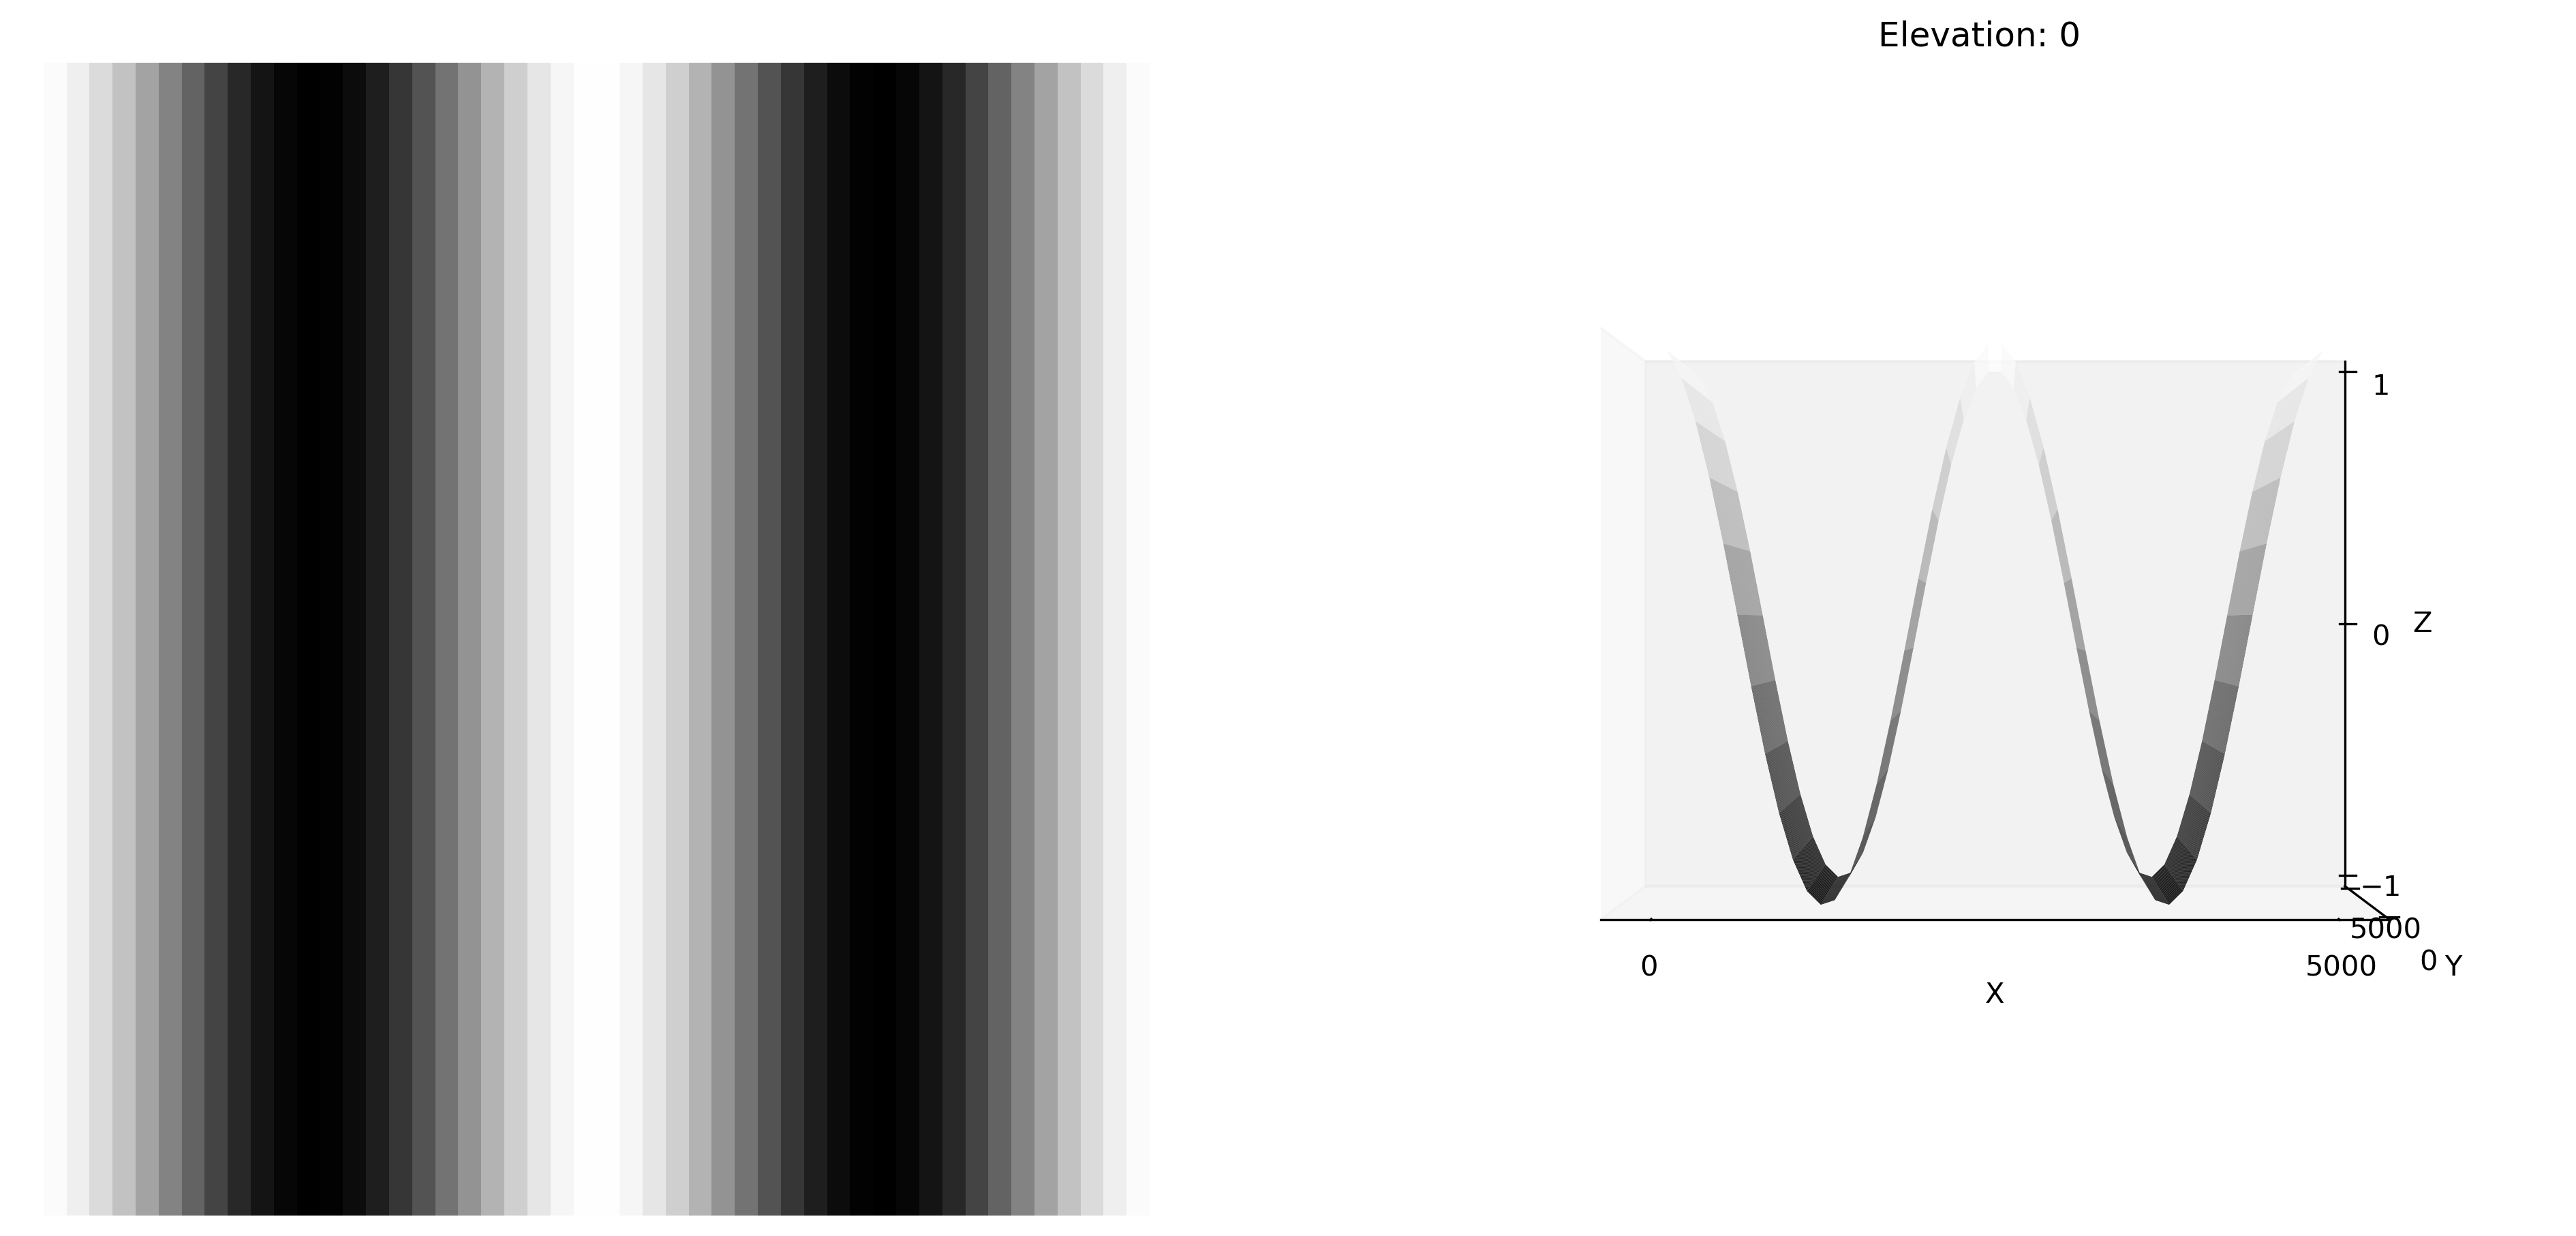

<Figure size 432x288 with 0 Axes>

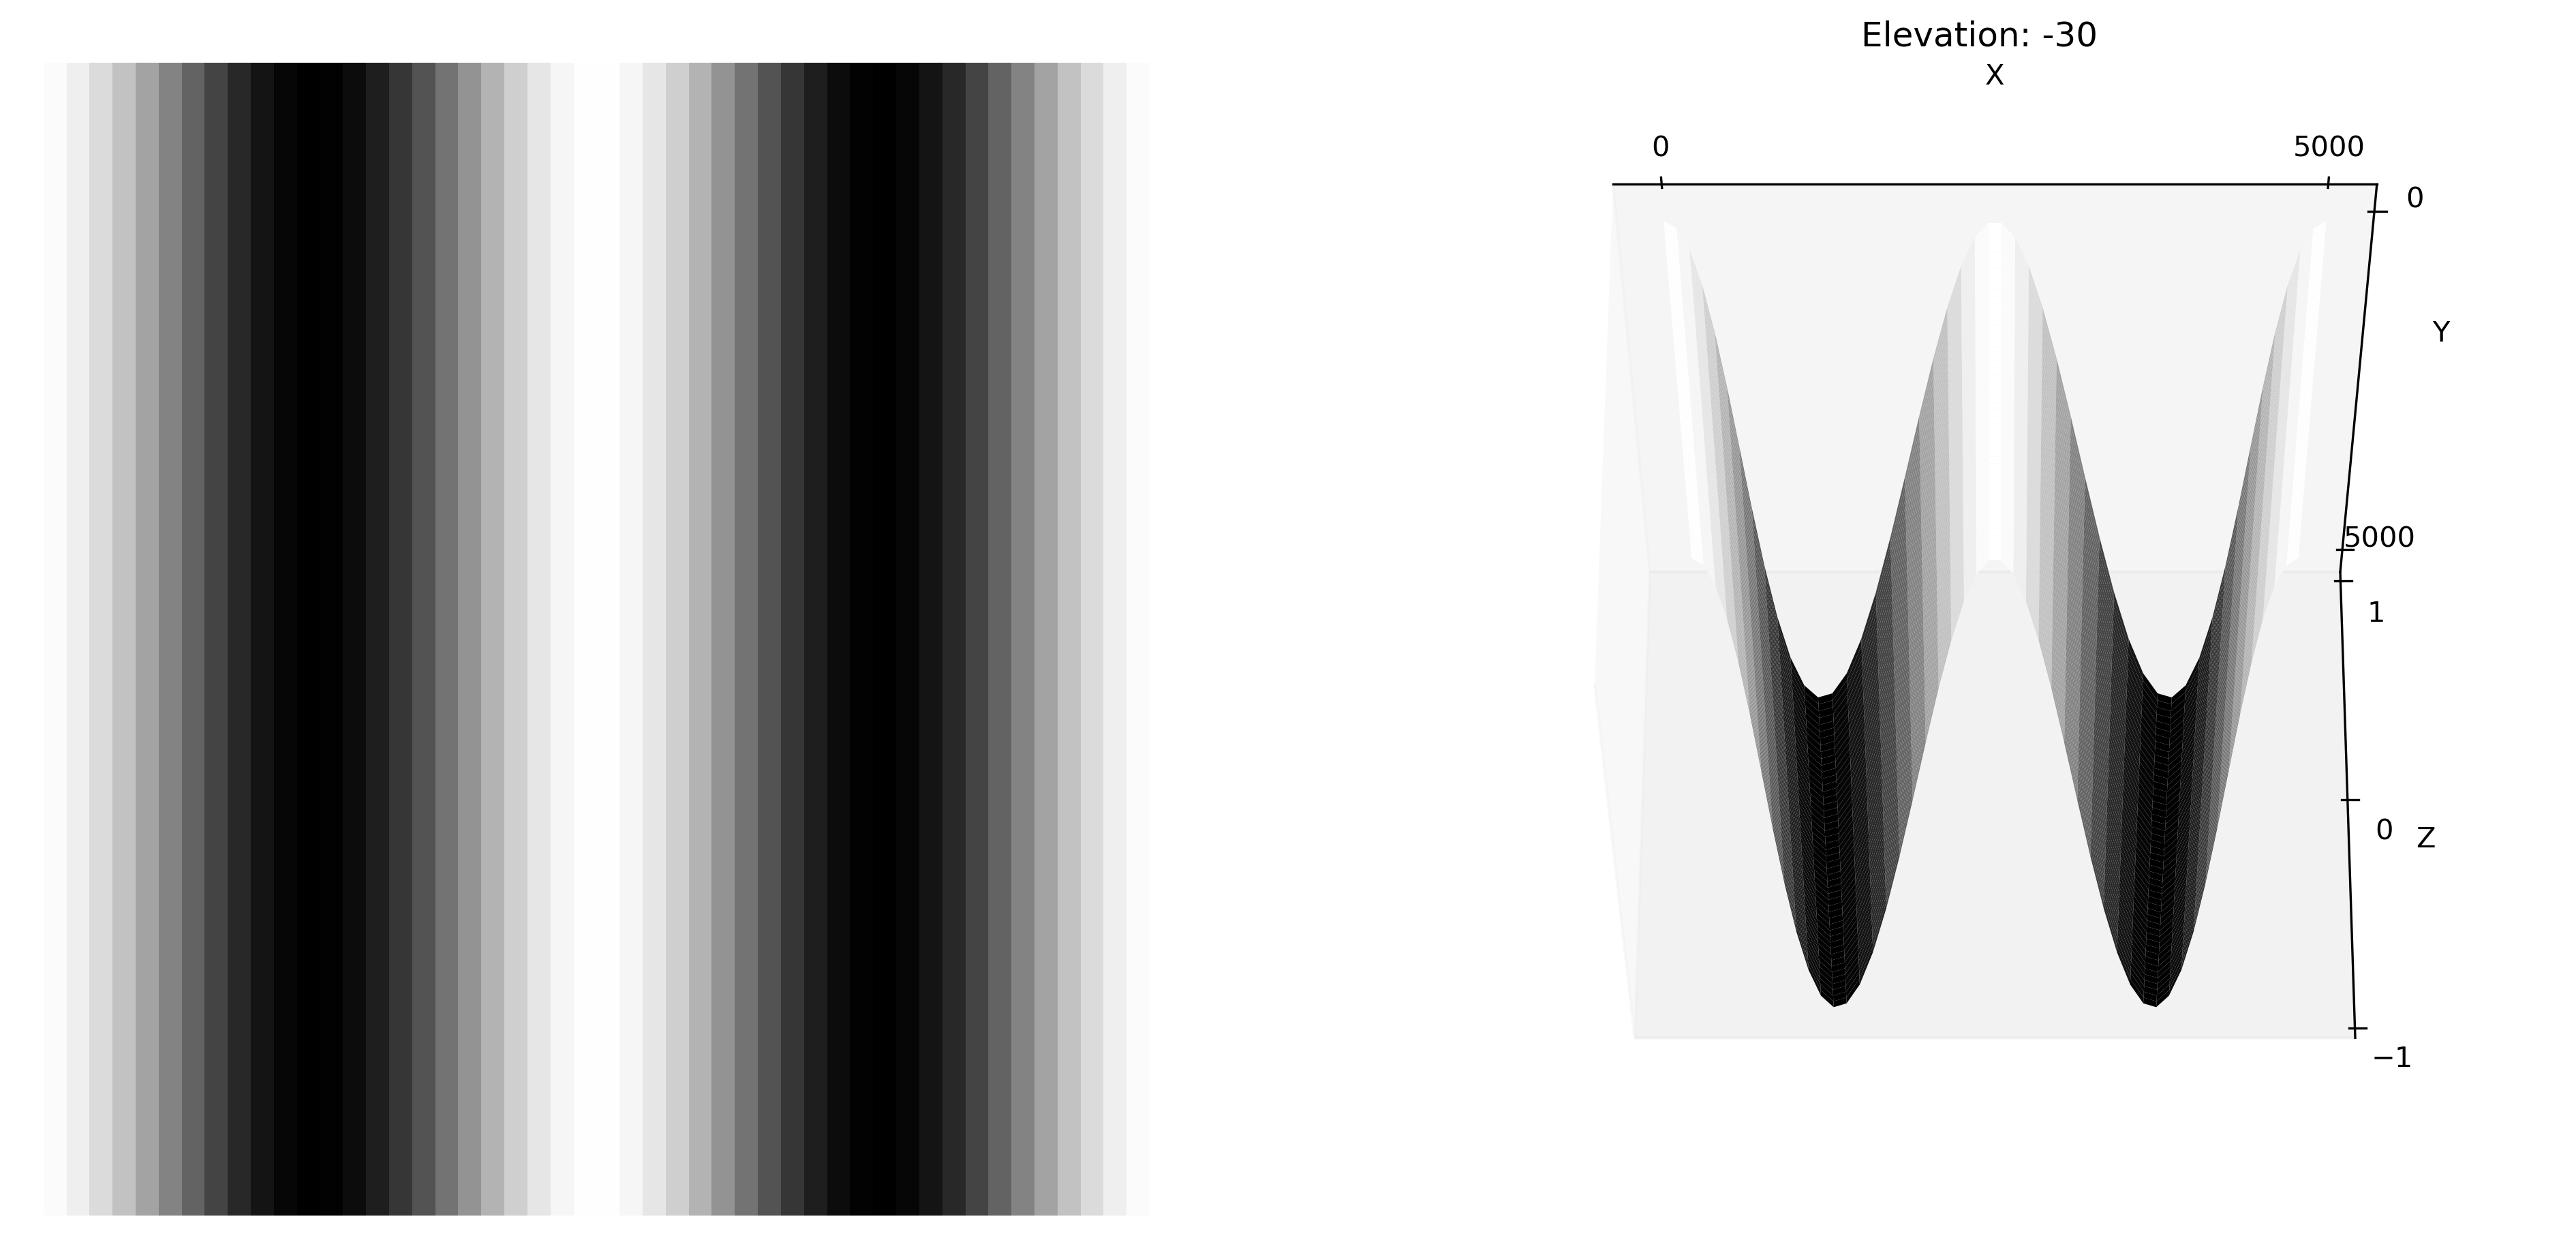

<Figure size 432x288 with 0 Axes>

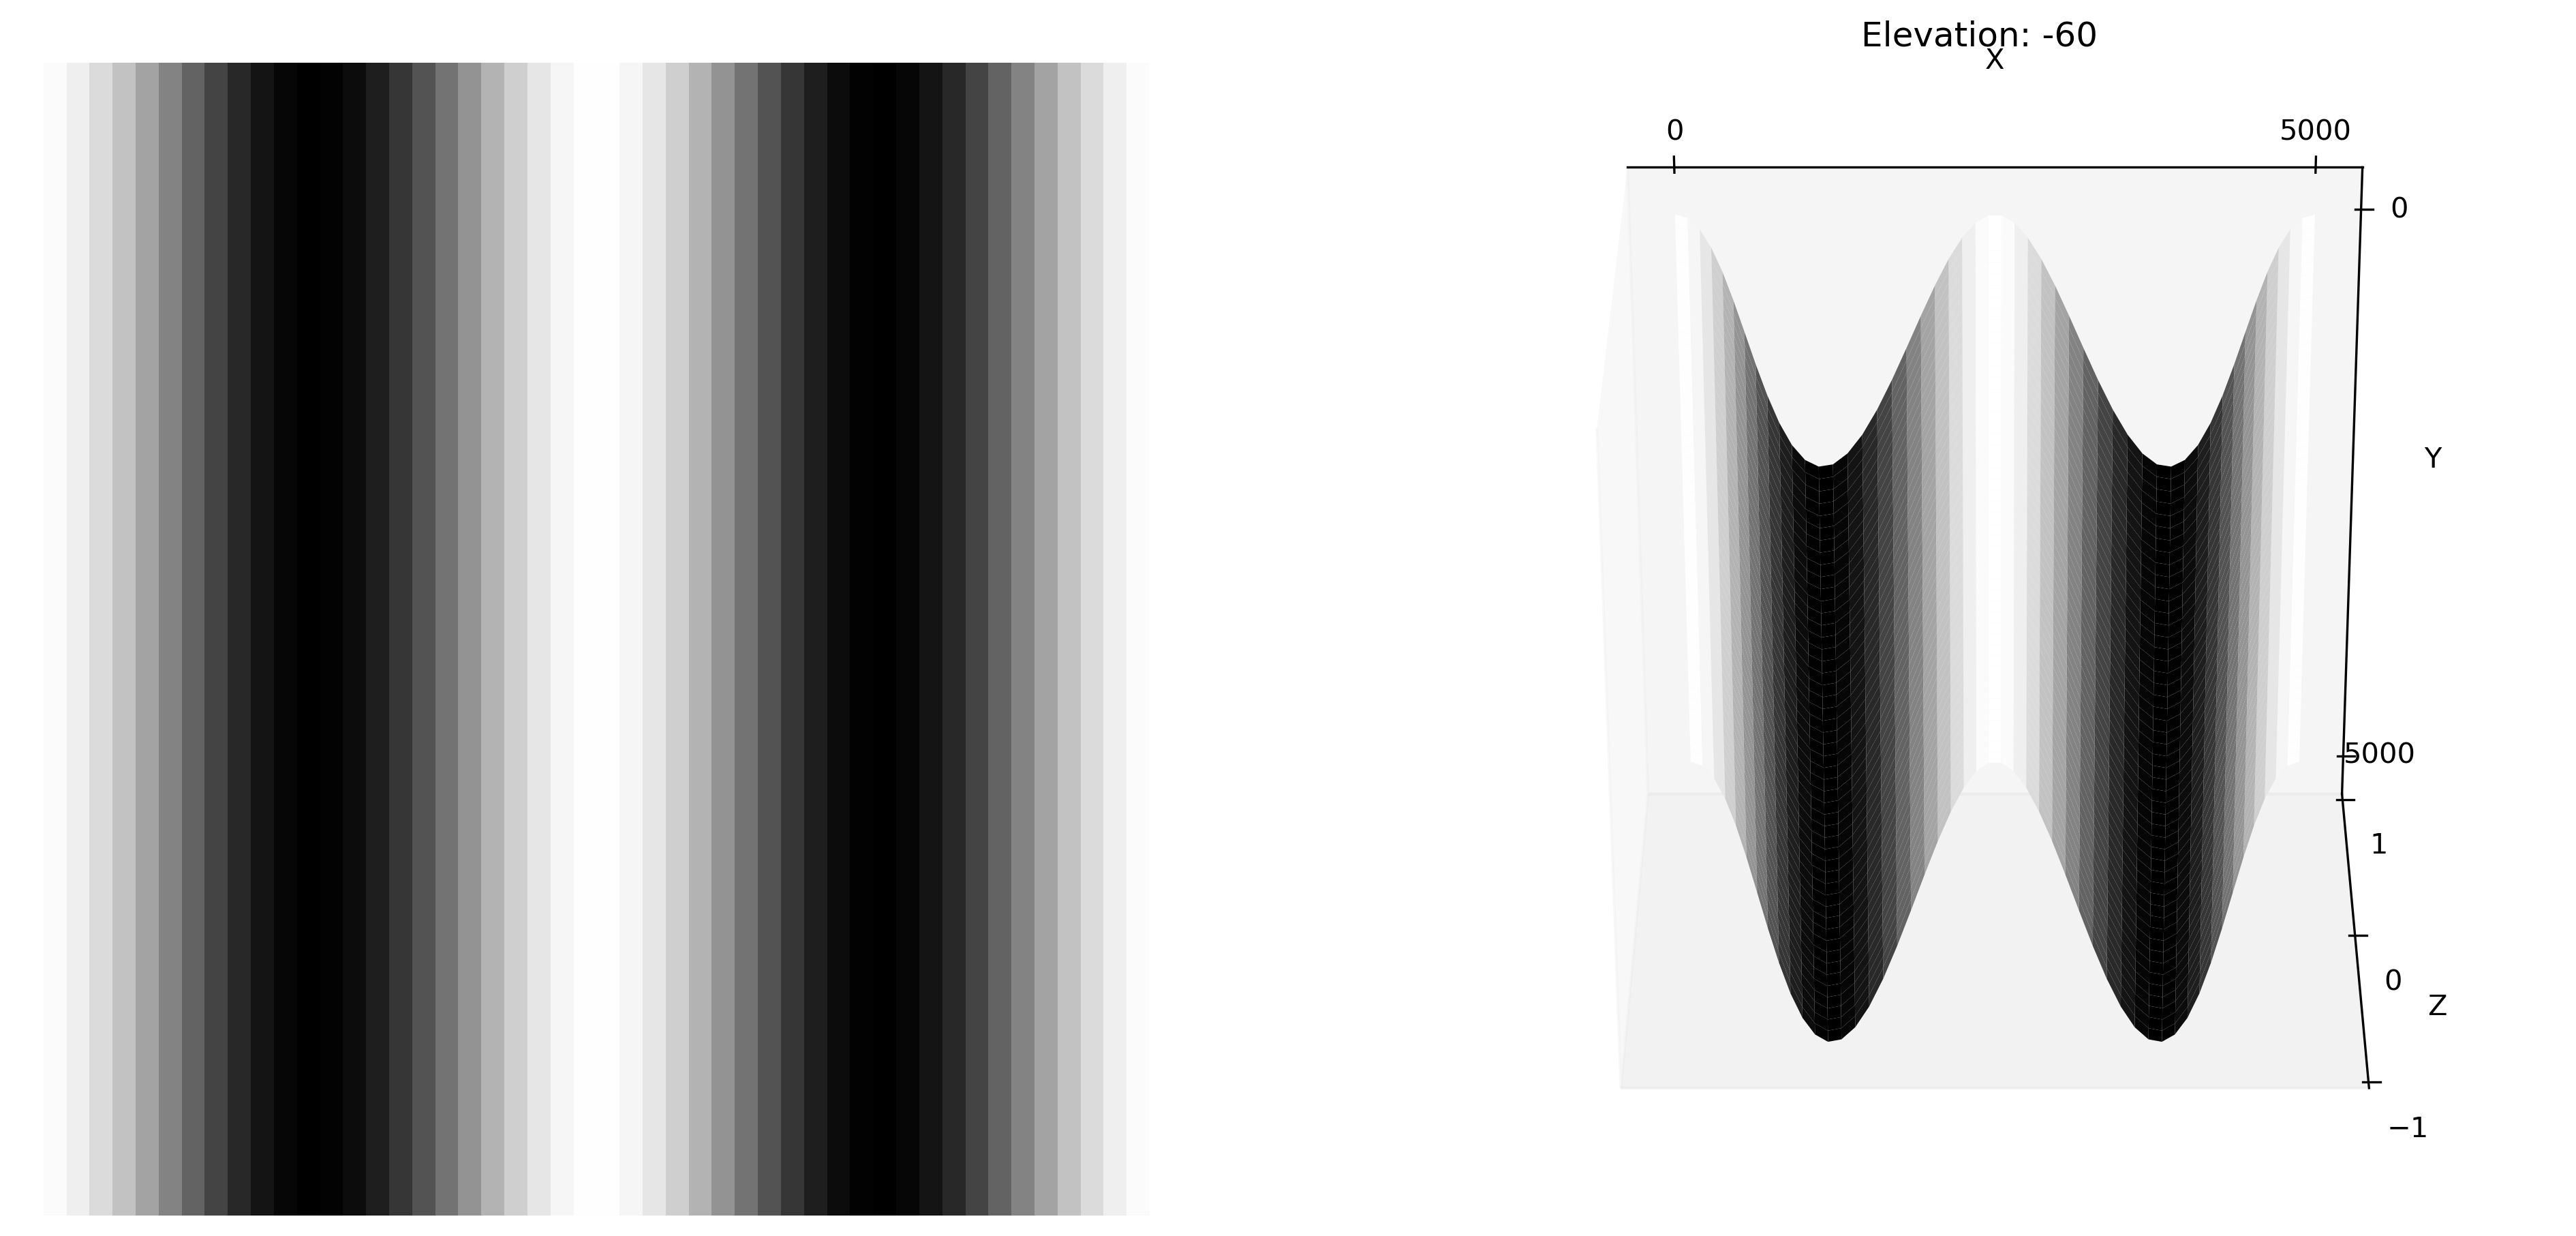

<Figure size 432x288 with 0 Axes>

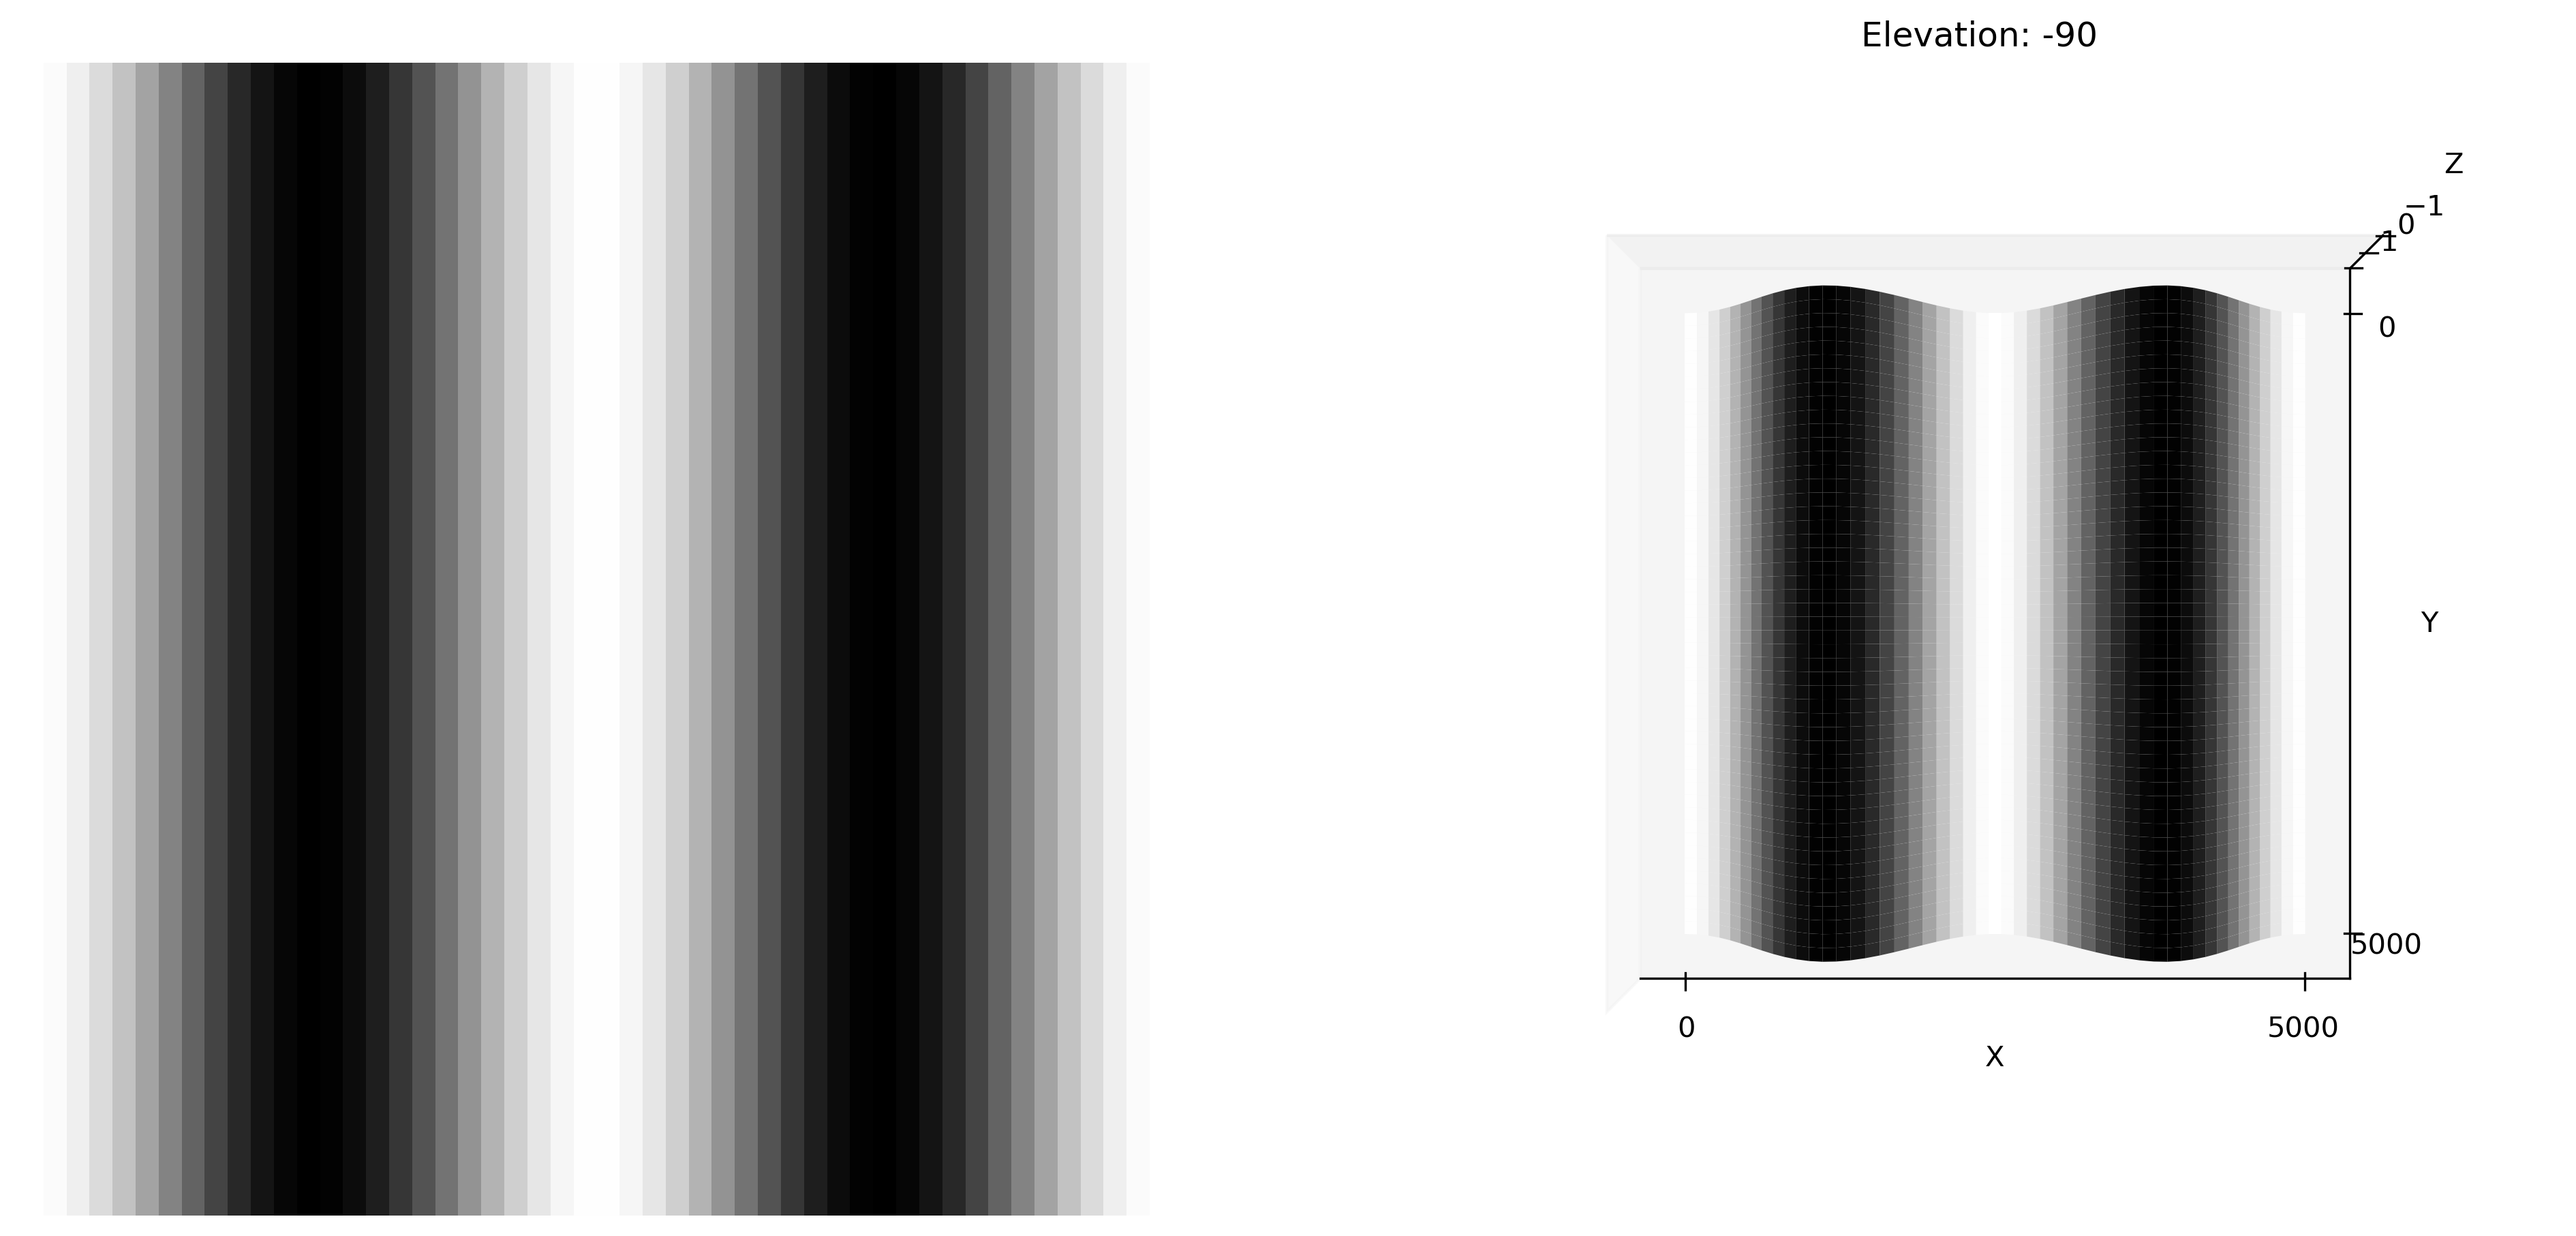

<Figure size 432x288 with 0 Axes>

In [73]:

M = 5000
N = 5000

x, y = np.meshgrid(np.linspace(0, M), np.linspace(0, N))
image = np.cos(2 * np.pi * x)

for angle in [0, -30, -60, -90]:
    fig = plt.figure(figsize=(16, 16), dpi=300)
    plt.tight_layout()

    fig.add_subplot(121)

    plt.imshow(image, cmap="gray")
    ax = plt.gca()
    ax.axis(False)

    ax = fig.add_subplot(122, projection="3d", )

    ax.plot_surface(x, y, image, cmap="gray",
                    linewidth=0, antialiased=True)
    ax.view_init(angle, -90)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([0, 5000])
    ax.set_yticks([0, 5000])
    ax.set_zticks([-1, 0, 1])

    ax.set_title(f"Elevation: {angle}")
    plt.show()
    plt.savefig(f"outputs/dimp 10 04 image in freq domain at {angle}.png")
